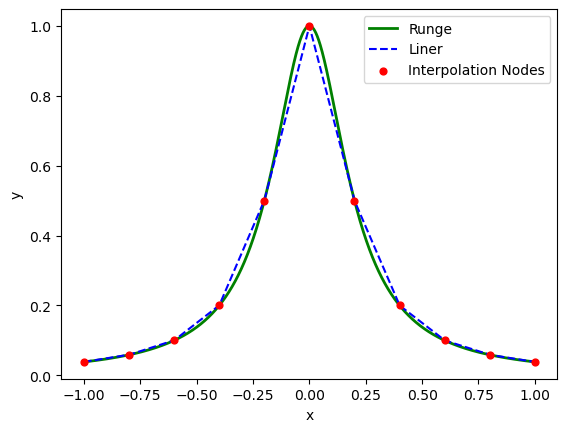

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicHermiteSpline



def Runge(ver):
    return 1/(1+25*ver*ver)

def liner(x0,x1,y0,y1,ver):
    return  (y1-y0)/(x1-x0)*(ver-x0) + y0
    

def div_liner(x,y,ver):
    l = len(x)
    for i in range(l-1):
        if ver>=x[i] and ver <=x[i+1]:
            return liner(x[i],x[i+1],y[i],y[i+1],ver)
    

x = np.linspace(-1, 1, num=10000)
y = Runge(x)



x_l = np.linspace(-1,1,num = 11)
y_l = Runge(x_l)

ver = np.linspace(-1,1,num = 10000)
y_ver = []
for i in ver:
    y_ver.append(div_liner(x_l,y_l,i))


plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,label="Runge",color="green", linewidth=2)
plt.plot(ver,y_ver,label="Liner",color="blue", linestyle='--')
plt.scatter(x_l, y_l, label="Interpolation Nodes", color="red", zorder=5, s=24)
plt.legend()
plt.show()



误差最大为: 6.250000000000001e-06


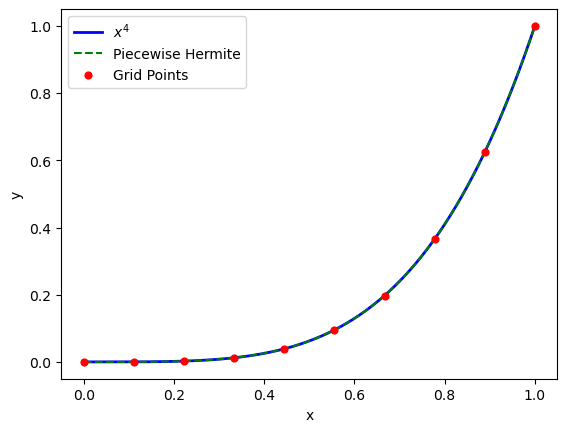

In [298]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicHermiteSpline


#x^4以及导数
def X4(ver):
    return ver**4 

def dX4(ver):
    return 4*(ver**3)

def ddddX4(ver):
    return 24


#实现Hermite插值
def lx(x,i):
    sum = 1
    for j in range(len(x)):
        if j == i:
            sum = sum
        else:
            sum = sum * (x[i]-x[j])
    return sum

def ls(ver,x,i):
    sum = 1
    for j in range(len(x)):
        if j == i:
            sum = sum
        else:
            sum = sum * (ver-x[j])
    return sum

def l(ver,x,i):
    return ls(ver,x,i)/lx(x,i)


def a(ver,x,i):
    sum = 0
    for j in range(len(x)):
        if j == i:
            sum =sum
        if j != i:
            sum = sum + 1/(x[i]-x[j])

    return (1-2*(ver-x[i])*sum)*l(ver,x,i)*l(ver,x,i)

def b(ver,x,i):
    return (ver-x[i])*l(ver,x,i)*l(ver,x,i)


def Hermite(ver,x,fx,fxx):
    sum = 0
    for i in range(len(x)):
        sum =sum + a(ver,x,i)*fx[i] + b(ver,x,i)*fxx[i]
    return sum


#实现分段
def div_f(x,fx,fxx,ver):
    l = len(x)
    for i in range(l-1):
        if ver>=x[i] and ver <=x[i+1]:
            x = [x[i],x[i+1]]
            fx = [fx[i],fx[i+1]]
            fxx = [fxx[i],fxx[i+1]]
            return Hermite(ver,x,fx,fxx)


#误差计算
def delt(h,ab):
    return (h**4)/384*np.max(ddddX4(ab))


#h
h = 0.1

#误差打印
ab = np.linspace(0,1,num=100000)
print(f"误差最大为: {delt(h, ab)}")



#原图
x = np.linspace(0, 1, num=10000)
y = X4(x)


#三次Hermite插值
x_h = np.linspace(0,1,num = int(1/h))
fx_h = X4(x_h)
fxx_h = dX4(x_h)

ver = np.linspace(0,1,num =100)
y_ver = []
for i in ver:
    y_ver.append(div_f(x_h,fx_h,fxx_h,i))


plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,label="$x^4$",color="blue", linewidth=2)
plt.plot(ver,y_ver,label="Piecewise Hermite",color="green", linestyle='--')
plt.scatter(x_h, fx_h, label="Grid Points", color="red", zorder=5, s=24)
plt.legend()
plt.show()



误差最大为: 0.003906250000000001


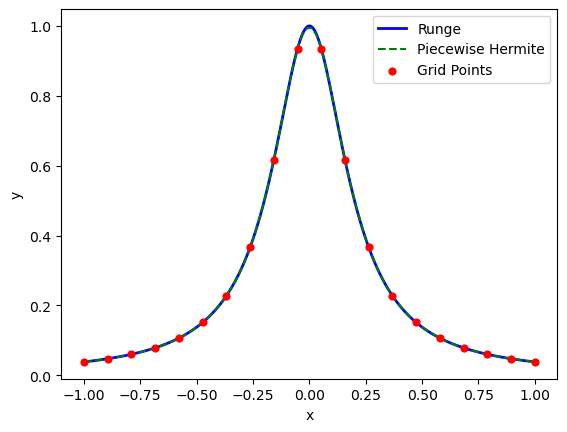

In [299]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicHermiteSpline




def Runge(ver):
    return 1/(1+25*ver*ver)

def dRunge(ver):
    return -50 * ver / ((1 + 25 * ver * ver) ** 2)

def ddddRunge(ver):
    numerator = 15000 * (3125 * ver**4 - 250 * ver**2 + 1)
    denominator = (1 + 25 * ver**2)**5
    return numerator / denominator


def lx(x,i):
    sum = 1
    for j in range(len(x)):
        if j == i:
            sum = sum
        else:
            sum = sum * (x[i]-x[j])
    return sum

def ls(ver,x,i):
    sum = 1
    for j in range(len(x)):
        if j == i:
            sum = sum
        else:
            sum = sum * (ver-x[j])
    return sum

def l(ver,x,i):
    return ls(ver,x,i)/lx(x,i)


def a(ver,x,i):
    sum = 0
    for j in range(len(x)):
        if j == i:
            sum =sum
        if j != i:
            sum = sum + 1/(x[i]-x[j])

    return (1-2*(ver-x[i])*sum)*l(ver,x,i)*l(ver,x,i)

def b(ver,x,i):
    return (ver-x[i])*l(ver,x,i)*l(ver,x,i)


def Hermite(ver,x,fx,fxx):
    sum = 0
    for i in range(len(x)):
        sum =sum + a(ver,x,i)*fx[i] + b(ver,x,i)*fxx[i]
    return sum


def div_f(x,fx,fxx,ver):
    l = len(x)
    for i in range(l-1):
        if ver>=x[i] and ver <=x[i+1]:
            x = [x[i],x[i+1]]
            fx = [fx[i],fx[i+1]]
            fxx = [fxx[i],fxx[i+1]]
            return Hermite(ver,x,fx,fxx)



#误差计算
def delt(h,ab):
    return (h**4)/384*np.max(ddddRunge(ab))


#h
h = 0.1

#误差打印
ab = np.linspace(0,1,num=100000)
print(f"误差最大为: {delt(h, ab)}")


#原图
x = np.linspace(-1, 1, num=10000)
y = Runge(x)


#分段插值拟合
x_h = np.linspace(-1,1, num = int(2/h))
fx_h = Runge(x_h)
fxx_h = dRunge(x_h)

ver = np.linspace(-1,1,num =100)
y_ver = []
for i in ver:
    y_ver.append(div_f(x_h,fx_h,fxx_h,i))




plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,label="Runge",color="blue", linewidth=2)
plt.plot(ver,y_ver,label="Piecewise Hermite",color="green", linestyle='--')
plt.scatter(x_h, fx_h, label="Grid Points", color="red", zorder=5, s=24)
plt.legend()
plt.show()